In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from astropy.io import fits
import warnings
import pandas
from spectral_cube import SpectralCube

warnings.filterwarnings('ignore')

In [65]:
west_path = '/home/scratch/hfwest/Pilot/'
morgan_path = '/home/scratch/lmorgan/Projects/GalacticBar/Midpoint_PaperII/Data/FitResults/'

# gaussian_11 = SpectralCube.read(morgan_path + 'Pilot_NH3_11_Fit.fits')
# gaussian_33 = SpectralCube.read(morgan_path + 'Pilot_NH3_33_Fit.fits')

gaussian_11 = fits.open(morgan_path + 'Pilot_NH3_11_Fit.fits')[0].data
gaussian_33 = fits.open(morgan_path + 'Pilot_NH3_33_Fit.fits')[0].data

# Shape: 285, 120, 220 [spectral depth, height, width]

nx = gaussian_11.shape[2]
ny = gaussian_11.shape[1]

In [ ]:
mask_11 = np.full((ny, nx), np.nan)
mask_33 = np.full((ny, nx), np.nan)

for i in range(ny):
    for j in range(nx):
        if max(gaussian_11[:, i, j]) > 0:
            mask_11[i, j] = np.argmax(gaussian_11[:, i, j])
        if max(gaussian_33[:, i, j]) > 0:
            mask_33[i, j] = np.argmax(gaussian_33[:, i, j])

x11, y11 = np.meshgrid(np.arange(mask_11.shape[1]), np.arange(mask_11.shape[0]))
x33, y33 = np.meshgrid(np.arange(mask_33.shape[1]), np.arange(mask_33.shape[0]))

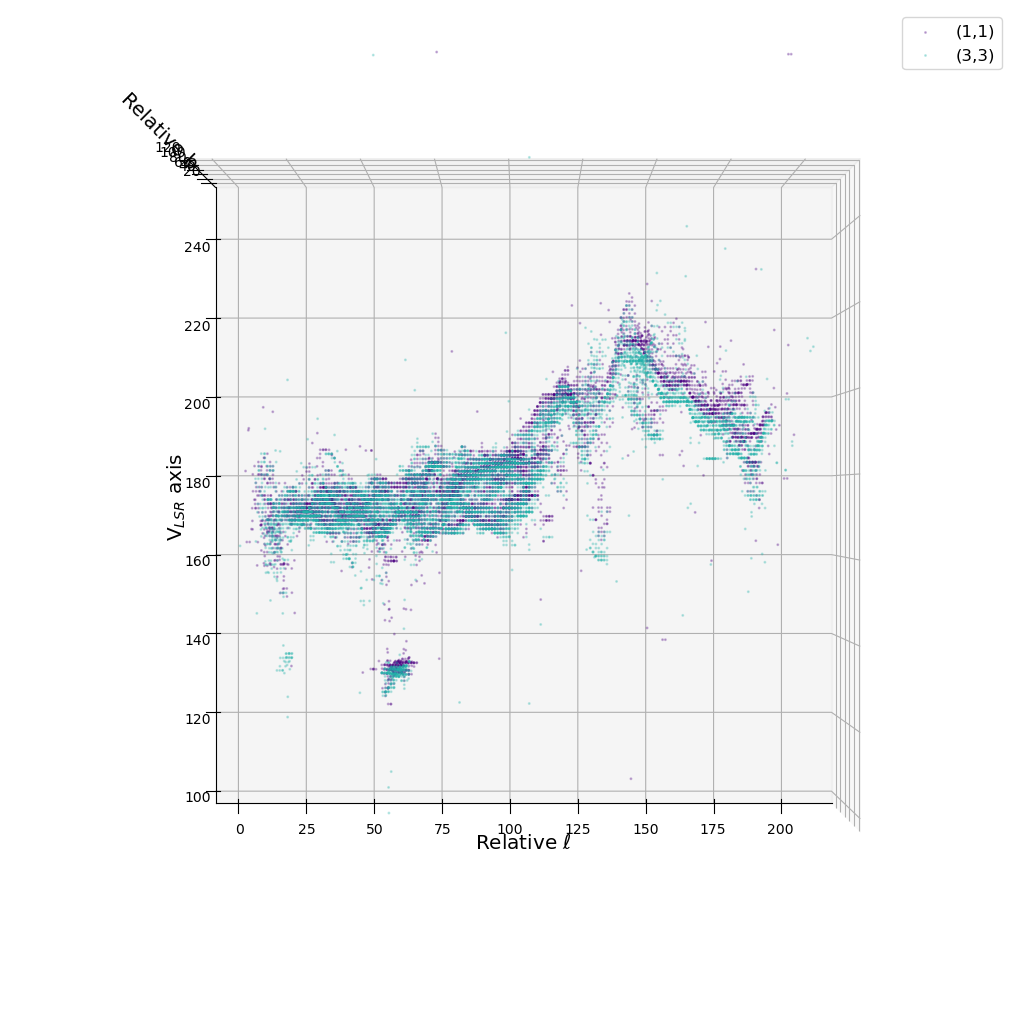

In [62]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
plt.tight_layout(pad = 0)

ax.scatter3D(x11, mask_11, y11, cmap = 'viridis', marker = '.', s = 5, label = '(1,1)', color = 'indigo', alpha = .25)
ax.scatter3D(x33, mask_33, y33, cmap = 'viridis', marker = '.', s = 5, label = '(3,3)', color = 'lightseagreen', alpha = .25)

ax.set_xlabel('Relative $\ell$', fontsize = 'x-large')
ax.set_zlabel('Relative b', fontsize = 'x-large')
ax.set_ylabel('V$_{LSR}$ axis', fontsize = 'x-large')
ax.legend(fontsize = 'large')

ax.set_ylim(100, 250)

# ax.view_init(elev= 20, azim = -70)
ax.view_init(elev = 90, azim = -90)

def rotate(a):
    ax.view_init(elev = 17, azim = a)

# anim = FuncAnimation(fig, rotate, frames = np.arange(-70, 290), interval = 30)
# anim.save('/home/scratch/hfwest/Pilot/Results/Updated_Vel_rotation_11_33.gif')

plt.show()